In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
abalone = pd.read_csv('abalone/abalone.data')

In [3]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       4176 non-null   object 
 1   0.455   4176 non-null   float64
 2   0.365   4176 non-null   float64
 3   0.095   4176 non-null   float64
 4   0.514   4176 non-null   float64
 5   0.2245  4176 non-null   float64
 6   0.101   4176 non-null   float64
 7   0.15    4176 non-null   float64
 8   15      4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
abalone.describe()

,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


#### check rows for missing, na or null values. if found, chuck 'em

In [5]:
# Check for missing values in the entire DataFrame
missing_values = abalone.isnull().sum()
print(missing_values)

M         0
0.455     0
0.365     0
0.095     0
0.514     0
0.2245    0
0.101     0
0.15      0
15        0
dtype: int64


In [6]:
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
abalone.columns = column_names
abalone

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


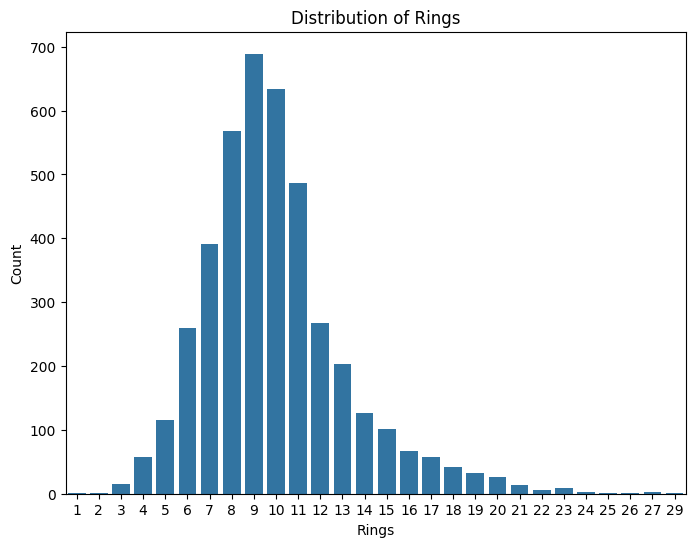

In [7]:
# Plot the distribution of the 'class' feature (11 Rings And Up vs. Below 11 Rings)
plt.figure(figsize=(8, 6))
sns.countplot(data=abalone, x='Rings')
plt.title('Distribution of Rings')
plt.xlabel('Rings')
plt.ylabel('Count')
plt.show()

#### Drop the rows where infant is the sex because they have ages below 11 and would skew the later binary split

In [8]:
# Filter the dataset for infants
infants = abalone[abalone['Sex'] == 'I']

# Calculate the average ring age for infants
average_ring_age_infants = infants['Rings'].mean()

print(f'The average ring age for infants is: {average_ring_age_infants:.2f}')

The average ring age for infants is: 7.89


In [9]:
# Drop rows where the 'Sex' is 'I'
abalone_no_infants = abalone[abalone['Sex'] != 'I']

In [10]:
print(abalone_no_infants.head())
print(abalone_no_infants.shape)

  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
1   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
2   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
5   F   0.530     0.415   0.150        0.7775          0.2370          0.1415   
6   F   0.545     0.425   0.125        0.7680          0.2940          0.1495   

   Shell_weight  Rings  
0         0.070      7  
1         0.210      9  
2         0.155     10  
5         0.330     20  
6         0.260     16  
(2834, 9)


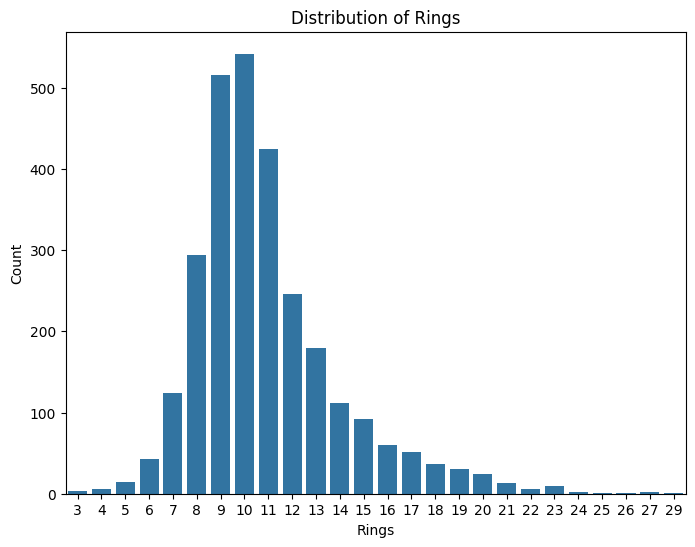

In [11]:
# Plot the distribution of the 'class' feature (edible vs. poisonous)
plt.figure(figsize=(8, 6))
sns.countplot(data=abalone_no_infants, x='Rings')
plt.title('Distribution of Rings')
plt.xlabel('Rings')
plt.ylabel('Count')
plt.show()

In [12]:
abalone = abalone_no_infants

#### Considering how counts drop significantly after age 11, we use threshold age of 11 to do a binary split on the rings age.

In [13]:
# Create the binary target variable, 1 if old, 0 if not
abalone.loc[:, '11_Rings_Or_More'] = abalone['Rings'].apply(lambda x: 1 if x >= 11 else 0)
abalone

/var/folders/xk/k8dyvhjj43d3vm_p1k410c080000gn/T/ipykernel_70038/131238396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abalone.loc[:, '11_Rings_Or_More'] = abalone['Rings'].apply(lambda x: 1 if x >= 11 else 0)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,11_Rings_Or_More
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0
5,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20,1
6,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16,1
...,...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0


In [14]:
abalone['11_Rings_Or_More'].value_counts()

11_Rings_Or_More
0    1543
1    1291
Name: count, dtype: int64

/var/folders/xk/k8dyvhjj43d3vm_p1k410c080000gn/T/ipykernel_70038/707345489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='11_Rings_Or_More', data=abalone, palette='viridis')


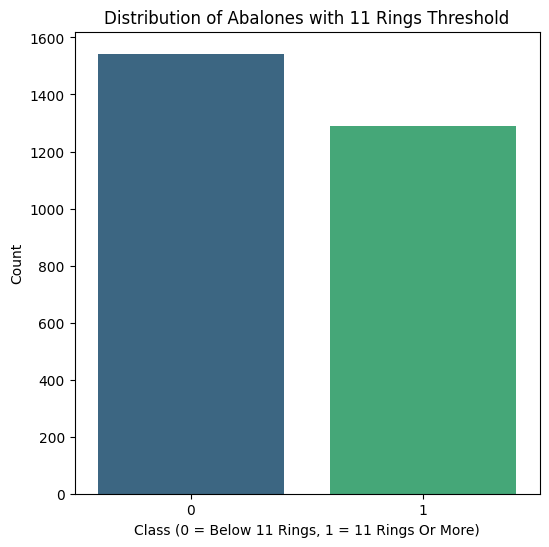

In [15]:
# Visualize the distribution of the binary target variable 'Old'
plt.figure(figsize=(6, 6))
sns.countplot(x='11_Rings_Or_More', data=abalone, palette='viridis')
plt.title('Distribution of Abalones with 11 Rings Threshold')
plt.xlabel('Class (0 = Below 11 Rings, 1 = 11 Rings Or More)')
plt.ylabel('Count')
plt.show()

#### One-hot-encode the Sex column

In [16]:
abalone = pd.get_dummies(abalone, columns=['Sex'], drop_first=True)
abalone.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,11_Rings_Or_More,Sex_M
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,True
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,False
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,True
5,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,1,False
6,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,1,False


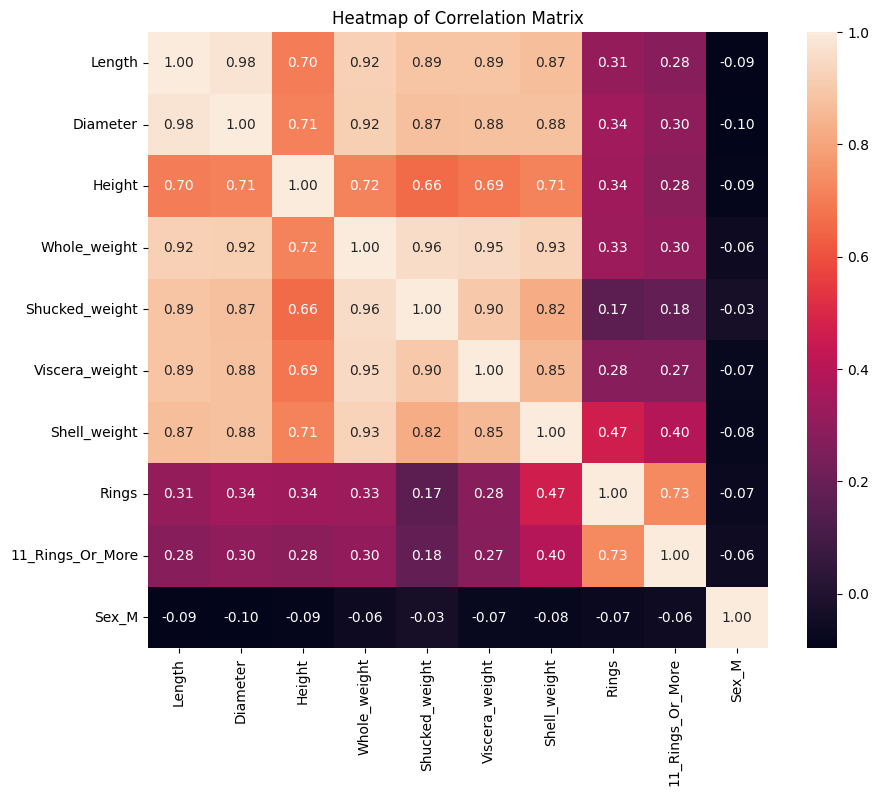

In [17]:
# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = abalone.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

/var/folders/xk/k8dyvhjj43d3vm_p1k410c080000gn/T/ipykernel_70038/260955181.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=abalone, x=column, palette='viridis', order=abalone[column].value_counts().index, ax=axes[i])
/var/folders/xk/k8dyvhjj43d3vm_p1k410c080000gn/T/ipykernel_70038/260955181.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=abalone, x=column, palette='viridis', order=abalone[column].value_counts().index, ax=axes[i])
/var/folders/xk/k8dyvhjj43d3vm_p1k410c080000gn/T/ipykernel_70038/260955181.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fals

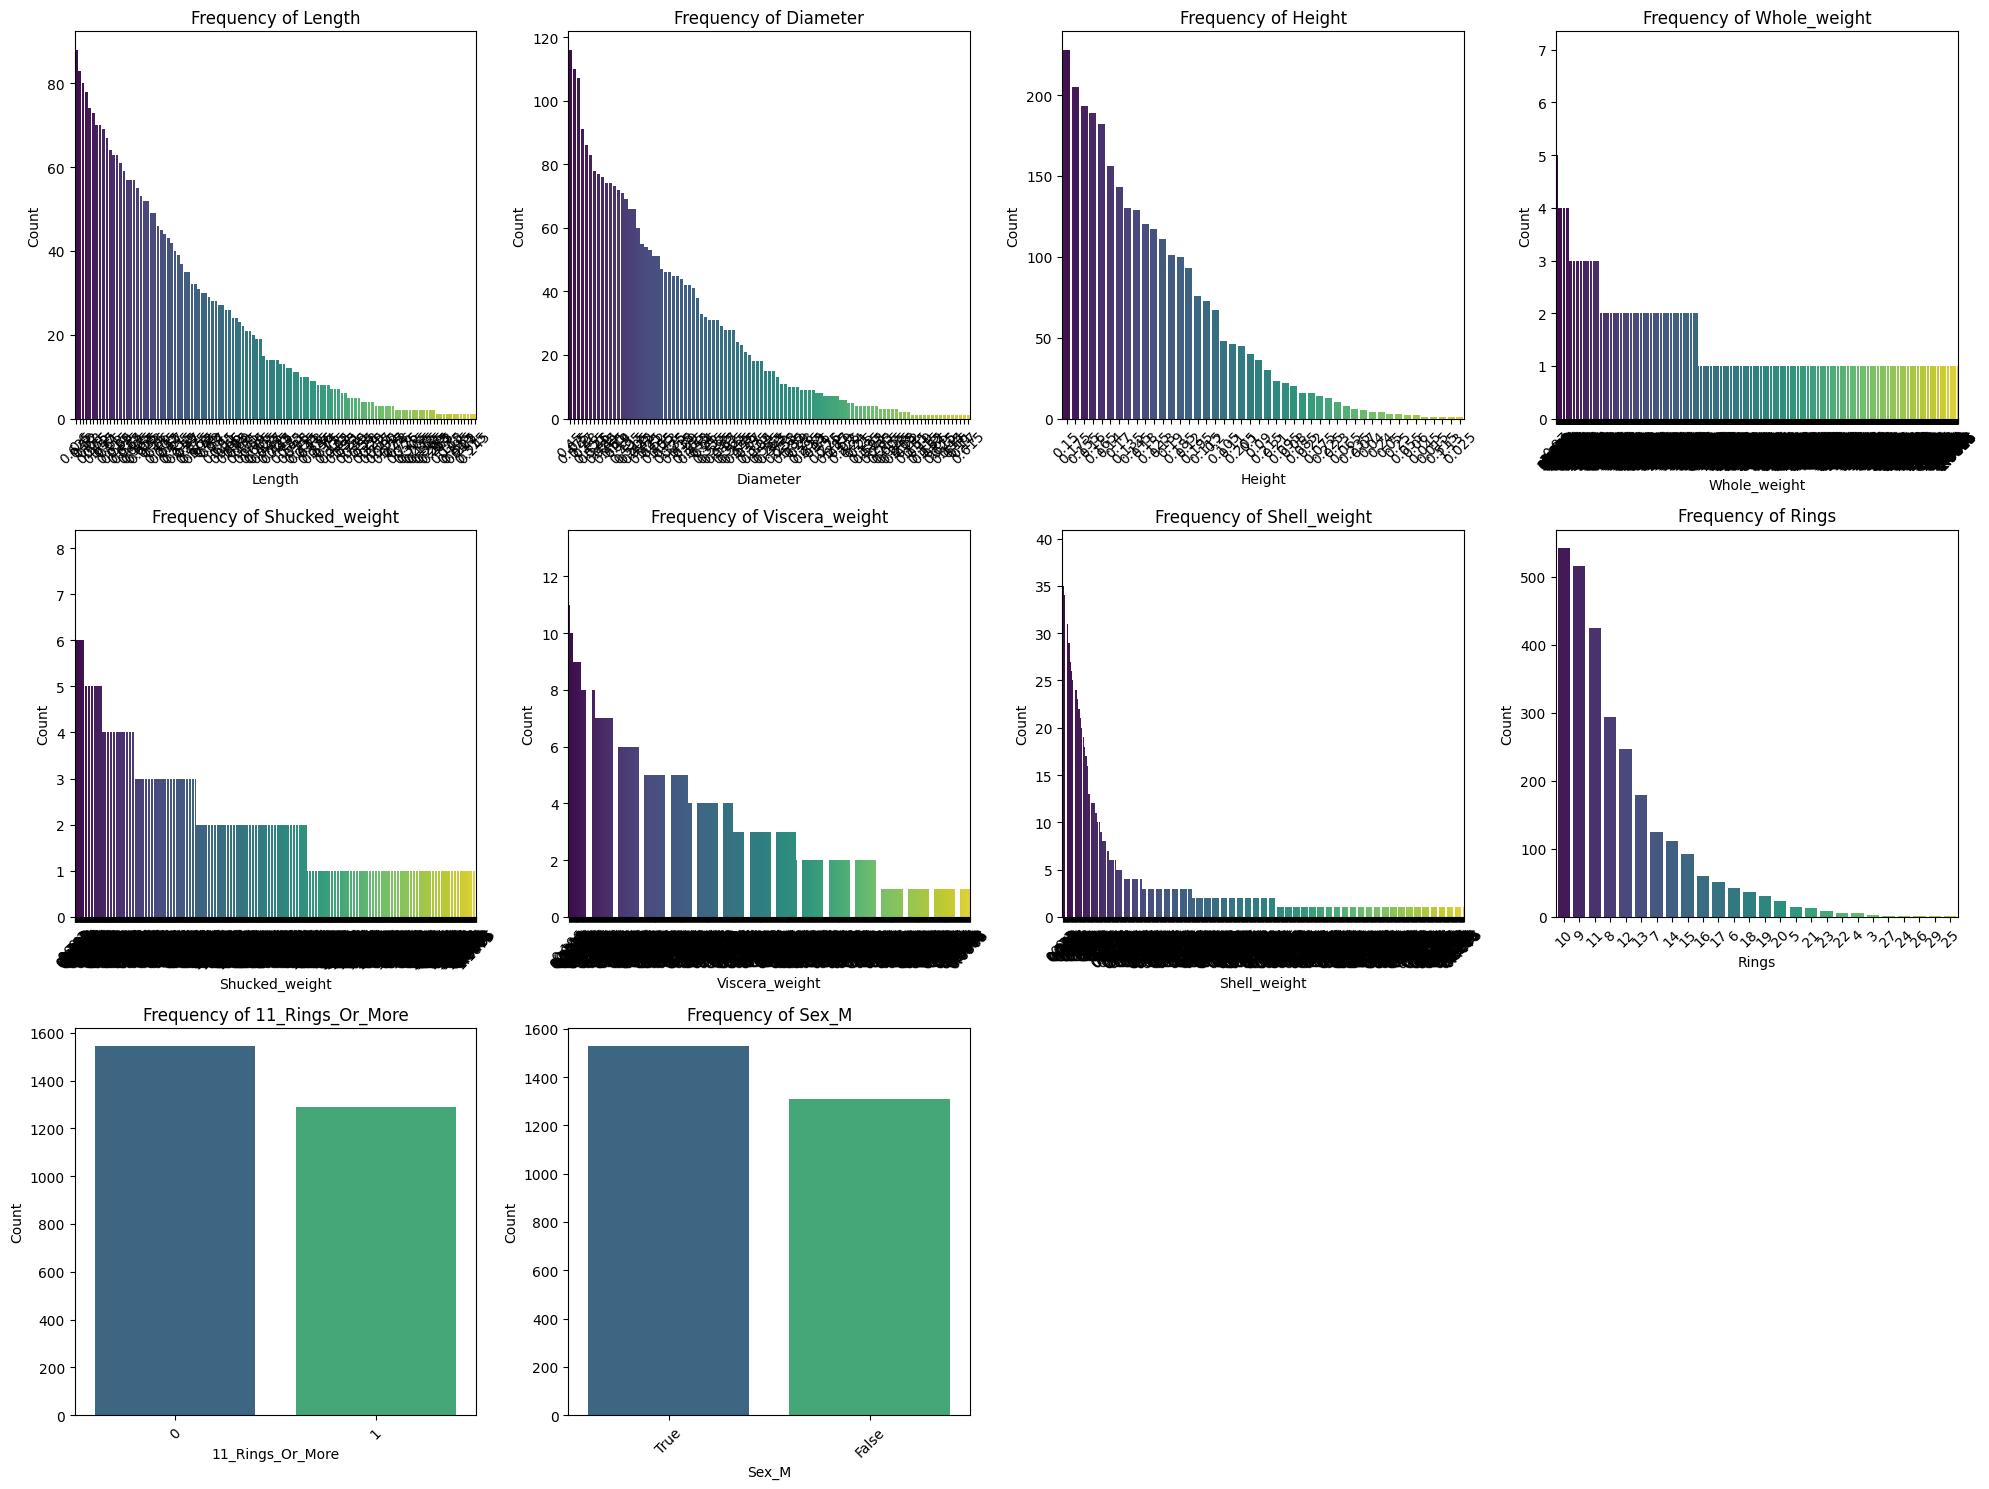

In [18]:
# Number of columns to display in the subplot grid
num_cols = 4

# Calculate the number of rows needed
num_rows = (len(abalone.columns) + num_cols - 1) // num_cols

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()

# Plot the frequency of categories for each feature as subplots
for i, column in enumerate(abalone.columns):
    sns.countplot(data=abalone, x=column, palette='viridis', order=abalone[column].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Frequency of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [19]:
# Separate features and target
feature_variables = abalone.drop(columns=['Rings', '11_Rings_Or_More']) #X variable
target_variable = abalone['11_Rings_Or_More'] #Y variable

#### split train/test set

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split 20/80 test/train set
X_train, X_test, y_train, y_test = train_test_split(feature_variables, target_variable, test_size=0.2, random_state=428)

#### standardize the features

In [21]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Normal backprop

In [22]:
from tqdm import tqdm
import pyperch
import time

In [23]:
from pyperch.neural import backprop_nn

#### do initial exploration to see how many epochs are required to reduce runtime later - use 5 stratifiedKFolds

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

from sklearn.datasets import make_classification
from torch import nn, optim
from skorch import NeuralNetClassifier
from pyperch.neural.backprop_nn import BackpropModule 
from skorch.callbacks import EpochScoring

In [29]:
# Convert train/test set to appropriate data types (need float)
X_train_scaled = X_train_scaled.astype(np.float32)
X_test_scaled = X_test_scaled.astype(np.float32)

y_train = y_train.astype(np.int64)
y_test = y_test.astype(np.int64)

#### modify the BackpropModule class to take in multiple activation functions

In [32]:
class BackpropModuleMODIFIED(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_units, hidden_layers, activation_function=nn.ReLU, dropout=0.5):
        super(BackpropModuleMODIFIED, self).__init__()
        self.layers = nn.ModuleList()
        self.activation = activation_function()
        self.dropout = nn.Dropout(p=dropout)

        self.layers.append(nn.Linear(input_dim, hidden_units))
        for _ in range(hidden_layers):
            self.layers.append(nn.Linear(hidden_units, hidden_units))
        self.layers.append(nn.Linear(hidden_units, output_dim))

    def forward(self, X):
        X = self.activation(self.layers[0](X))
        X = self.dropout(X)
        for i in range(1, len(self.layers) - 1):
            X = self.activation(self.layers[i](X))
            X = self.dropout(X)
        X = self.layers[-1](X)
        return X

#### in paper explain why F1 (macro) over micro, weighted, samples. use max_epochs=200 (from prev paper knew that but shouldnt mention it again)

In [43]:
# Define the neural network with skorch and BackpropModule - use F1 score
activation_functions = {
    'relu': nn.ReLU,
    'sigmoid': nn.Sigmoid,
    'tanh': nn.Tanh
}

# StratifiedKFold Cross-Validation on the training set
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=428)
results = []
histories = {}

for activation_name, activation_fn in tqdm(activation_functions.items(), desc="Activation Functions"):
    f1_scores_per_epoch = []
    losses_per_epoch = []
    runtimes_per_epoch = []
    
    for train_index, val_index in tqdm(skf.split(X_train_scaled, y_train), desc=f"{activation_name} CV Folds", leave=False):
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        net = NeuralNetClassifier(
            module=BackpropModuleMODIFIED,
            module__input_dim=X_train_fold.shape[1],
            module__output_dim=2,
            module__hidden_units=30,
            module__hidden_layers=1,
            module__activation_function=activation_fn,
            max_epochs=200,
            verbose=0,
            callbacks=[EpochScoring(scoring='f1', name='train_acc', on_train=True)],
            criterion=nn.CrossEntropyLoss,
            optimizer=optim.SGD,
            lr=0.05,
            iterator_train__shuffle=True,
        )
        
        start_time = time.time()
        net.fit(X_train_fold, y_train_fold)
        end_time = time.time()
        
        runtime = end_time - start_time
        runtimes_per_epoch.append(runtime)
        
        y_pred = net.predict(X_val_fold)
        f1 = f1_score(y_val_fold, y_pred)
        f1_scores_per_epoch.append(f1)
        losses_per_epoch.append(net.history[-1, 'train_loss'])

    avg_f1_scores = np.mean(f1_scores_per_epoch, axis=0)
    avg_losses = np.mean(losses_per_epoch, axis=0)
    avg_runtimes = np.mean(runtimes_per_epoch, axis=0)
    histories[activation_name] = (avg_f1_scores, avg_losses, avg_runtimes)

Activation Functions:   0%|                               | 0/3 [00:00<?, ?it/s]
relu CV Folds: 0it [00:00, ?it/s]
relu CV Folds: 1it [00:18, 18.40s/it]
relu CV Folds: 2it [00:40, 20.82s/it]
relu CV Folds: 3it [01:02, 21.14s/it]
relu CV Folds: 4it [01:23, 20.95s/it]
relu CV Folds: 5it [01:46, 21.72s/it]
Activation Functions:  33%|███████▎              | 1/3 [01:46<03:32, 106.41s/it]
sigmoid CV Folds: 0it [00:00, ?it/s]
sigmoid CV Folds: 1it [00:21, 21.28s/it]
sigmoid CV Folds: 2it [00:42, 21.04s/it]
sigmoid CV Folds: 3it [01:04, 21.42s/it]
sigmoid CV Folds: 4it [01:24, 20.93s/it]
sigmoid CV Folds: 5it [01:44, 20.70s/it]
Activation Functions:  67%|██████████████▋       | 2/3 [03:30<01:45, 105.33s/it]
tanh CV Folds: 0it [00:00, ?it/s]
tanh CV Folds: 1it [00:21, 21.87s/it]
tanh CV Folds: 2it [00:42, 21.14s/it]
tanh CV Folds: 3it [01:03, 21.27s/it]
tanh CV Folds: 4it [01:24, 21.08s/it]
tanh CV Folds: 5it [01:45, 20.82s/it]
Activation Functions: 100%|██████████████████████| 3/3 [05:16<00:00

In [44]:
net.fit(X_train_scaled, y_train)
y_proba_train = net.predict_proba(X_train_scaled)

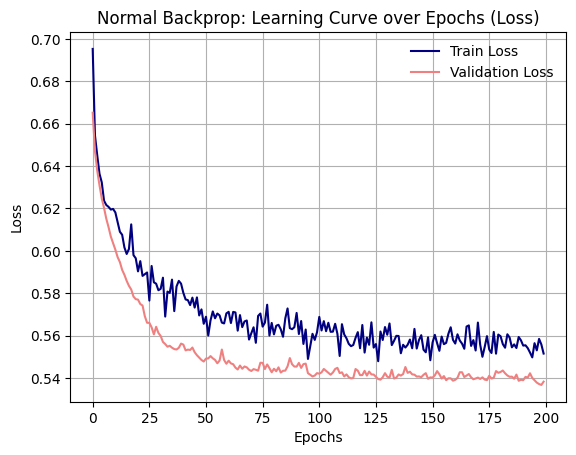

In [47]:
# plot the iterative learning curve (loss)
plt.plot(net.history[:, 'train_loss'], label='Train Loss', color='navy')
plt.plot(net.history[:, 'valid_loss'], label='Validation Loss', color='lightcoral')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Normal Backprop: Learning Curve over Epochs (Loss)")
plt.grid(visible=True)
plt.legend(frameon=False)

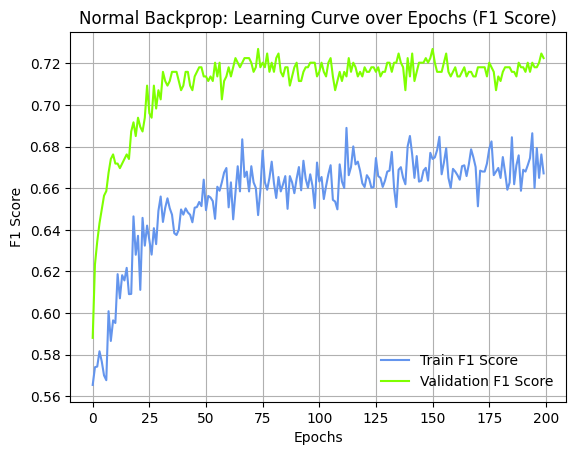

In [48]:
# plot the iterative learning curve (F1_score)
plt.plot(net.history[:, 'train_acc'], label='Train F1 Score', color='cornflowerblue')
plt.plot(net.history[:, 'valid_acc'], label='Validation F1 Score', color='chartreuse')
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.title("Normal Backprop: Learning Curve over Epochs (F1 Score)")
plt.grid(visible=True)
plt.legend(frameon=False)

#### rerun normal backprop to get stats for plotting activation functions on same plot 

In [53]:
# Define the neural network with skorch and BackpropModule
activation_functions = {
    'relu': nn.ReLU,
    'sigmoid': nn.Sigmoid,
    'tanh': nn.Tanh
}

# StratifiedKFold Cross-Validation on the training set
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=428)
results = []
histories = {}

for activation_name, activation_fn in tqdm(activation_functions.items(), desc="Activation Functions"):
    f1_scores_per_epoch = []
    train_losses_per_epoch = []
    valid_losses_per_epoch = []
    runtimes_per_epoch = []
    
    for train_index, val_index in tqdm(skf.split(X_train_scaled, y_train), desc=f"{activation_name} CV Folds", leave=False):
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        net = NeuralNetClassifier(
            module=BackpropModuleMODIFIED,
            module__input_dim=X_train_fold.shape[1],
            module__output_dim=2,
            module__hidden_units=30,
            module__hidden_layers=1,
            module__activation_function=activation_fn,
            max_epochs=500,
            verbose=0,
            callbacks=[EpochScoring(scoring='f1', name='train_acc', on_train=True)],
            criterion=nn.CrossEntropyLoss,
            optimizer=optim.SGD,
            lr=0.05,
            iterator_train__shuffle=True,
        )
        
        start_time = time.time()
        net.fit(X_train_fold, y_train_fold)
        end_time = time.time()
        
        runtime = end_time - start_time
        runtimes_per_epoch.append(runtime)
        
        y_pred = net.predict(X_val_fold)
        f1 = f1_score(y_val_fold, y_pred)
        f1_scores_per_epoch.append(f1)
        
        # Collect the losses per epoch
        train_losses_per_epoch.append(net.history[:, 'train_loss'])
        valid_losses_per_epoch.append(net.history[:, 'valid_loss'])

    avg_f1_scores = np.mean(f1_scores_per_epoch, axis=0)
    avg_train_losses = np.mean(train_losses_per_epoch, axis=0)
    avg_valid_losses = np.mean(valid_losses_per_epoch, axis=0)
    avg_runtimes = np.mean(runtimes_per_epoch, axis=0)
    histories[activation_name] = (avg_f1_scores, avg_train_losses, avg_valid_losses, avg_runtimes)


Activation Functions:   0%|                               | 0/3 [00:00<?, ?it/s]
relu CV Folds: 0it [00:00, ?it/s]
relu CV Folds: 1it [00:49, 49.75s/it]
relu CV Folds: 2it [01:38, 49.06s/it]
relu CV Folds: 3it [02:28, 49.34s/it]
relu CV Folds: 4it [03:17, 49.28s/it]
relu CV Folds: 5it [04:07, 49.47s/it]
Activation Functions:  33%|███████▎              | 1/3 [04:07<08:14, 247.05s/it]
sigmoid CV Folds: 0it [00:00, ?it/s]
sigmoid CV Folds: 1it [00:49, 49.17s/it]
sigmoid CV Folds: 2it [01:37, 48.70s/it]
sigmoid CV Folds: 3it [02:27, 49.05s/it]
sigmoid CV Folds: 4it [03:18, 49.91s/it]
sigmoid CV Folds: 5it [04:05, 49.07s/it]
Activation Functions:  67%|██████████████▋       | 2/3 [08:12<04:06, 246.36s/it]
tanh CV Folds: 0it [00:00, ?it/s]
tanh CV Folds: 1it [00:49, 49.37s/it]
tanh CV Folds: 2it [01:38, 49.08s/it]
tanh CV Folds: 3it [02:28, 49.52s/it]
tanh CV Folds: 4it [03:16, 49.03s/it]
tanh CV Folds: 5it [04:07, 49.65s/it]
Activation Functions: 100%|██████████████████████| 3/3 [12:20<00:00

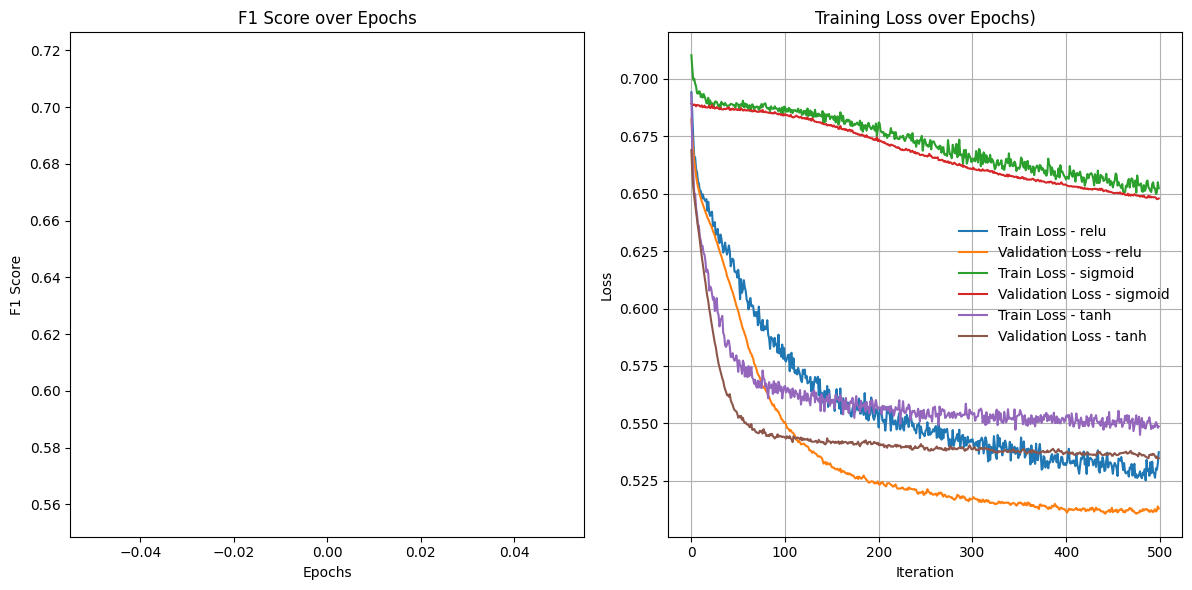

In [56]:
 # Plot F1 Score, Loss, and Runtime curves for each activation function
plt.figure(figsize=(18, 6))

for activation_name, (f1_scores, train_losses, valid_losses, runtimes) in histories.items():
    plt.subplot(1, 3, 1)
    plt.plot(f1_scores, label=f'{activation_name}')
    plt.title('F1 Score over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')

    plt.subplot(1, 3, 2)
    plt.plot(train_losses, label=f'Train Loss - {activation_name}')
    plt.plot(valid_losses, label=f'Validation Loss - {activation_name}')
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Training Loss over Epochs)")
    plt.grid(visible=True)
    plt.legend(frameon=False)

plt.tight_layout()
plt.show()

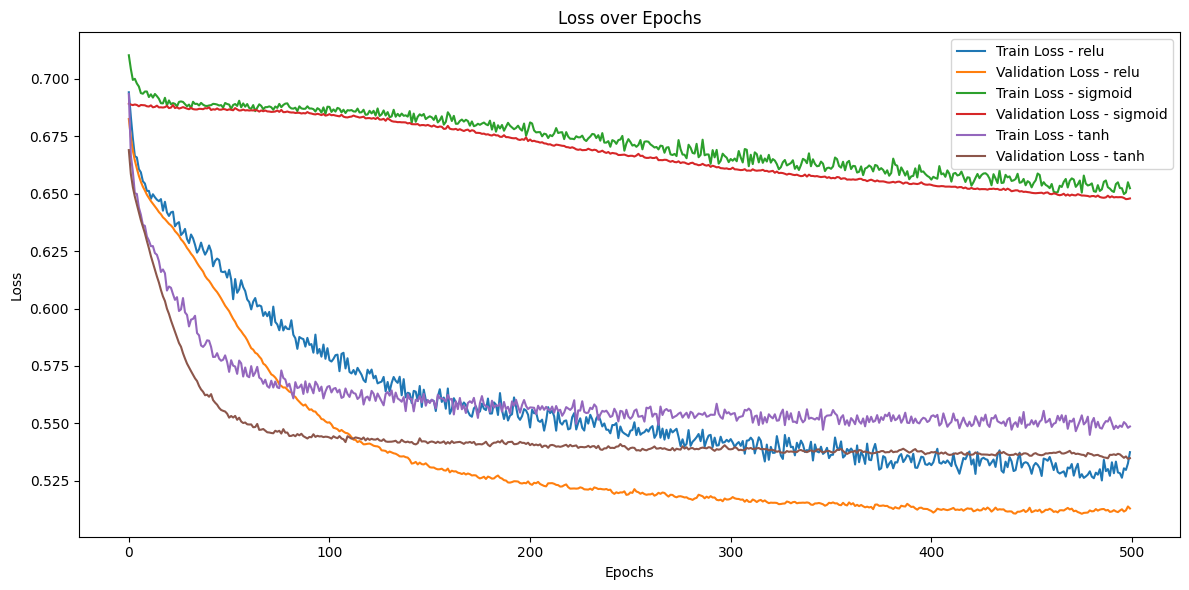

In [60]:
# Training and Validation Loss over epochs
plt.figure(figsize=(12, 6))
for activation_name, (f1_scores, train_losses, valid_losses, runtimes) in histories.items():
    plt.plot(train_losses, label=f'Train Loss - {activation_name}')
    plt.plot(valid_losses, label=f'Validation Loss - {activation_name}')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### determine best activation function with a design matrix (multiple activation functions against multiple cv folds) - because convergence is quick, can lower it down to 50

In [62]:
# Define the neural network with skorch and BackpropModule
activation_functions = {
    'relu': nn.ReLU,
    'sigmoid': nn.Sigmoid,
    'tanh': nn.Tanh
}

def create_model(input_dim, output_dim, hidden_units, hidden_layers, activation_function):
    return NeuralNetClassifier(
        module=BackpropModuleMODIFIED,
        module__input_dim=input_dim,
        module__output_dim=output_dim,
        module__hidden_units=hidden_units,
        module__hidden_layers=hidden_layers,
        module__activation_function=activation_function,
        max_epochs=50,
        verbose=0,
        callbacks=[EpochScoring(scoring='f1', name='train_acc', on_train=True)],
        criterion=nn.CrossEntropyLoss,
        optimizer=optim.SGD,
        lr=0.05,
        iterator_train__shuffle=True,
    )

# Parameters
activation_functions_list = ['relu', 'sigmoid', 'tanh']
cv_folds_list = [3, 5, 7, 10]

results = []

for activation in tqdm(activation_functions_list, desc="Activations"):
    for cv_folds in tqdm(cv_folds_list, desc=f'Activation: {activation}, Fold: {cv_folds}', leave=False):
        skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
        val_f1_scores = []
        runtimes = []
        
        for train_index, val_index in skf.split(X_train_scaled, y_train):
            X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

            net = create_model(X_train_fold.shape[1], 2, 30, 1, activation_functions[activation])
            
            start_time = time.time()
            net.fit(X_train_fold, y_train_fold)
            end_time = time.time()

            runtime = end_time - start_time
            runtimes.append(runtime)

            y_pred = net.predict(X_val_fold)
            val_f1 = f1_score(y_val_fold, y_pred)
            val_f1_scores.append(val_f1)

        mean_f1_score = np.mean(val_f1_scores)
        mean_runtime = np.mean(runtimes)
        results.append({'activation': activation, 'cv_folds': cv_folds, 'mean_f1_score': mean_f1_score, 'mean_runtime (s)': mean_runtime})

results_df = pd.DataFrame(results)
print(results_df)

Activations: 100%|███████████████████████████████| 3/3 [06:30<00:00, 130.25s/it]

   activation  cv_folds  mean_f1_score  mean_runtime (s)
0        relu         3       0.580476          4.553901
1        relu         5       0.594022          4.935467
2        relu         7       0.627121          5.444523
3        relu        10       0.616164          5.357302
4     sigmoid         3       0.000000          3.974512
5     sigmoid         5       0.000000          4.803298
6     sigmoid         7       0.070561          5.574973
7     sigmoid        10       0.000000          5.442683
8        tanh         3       0.653522          4.557365
9        tanh         5       0.657691          4.832269
10       tanh         7       0.657781          5.284730
11       tanh        10       0.652928          5.495986


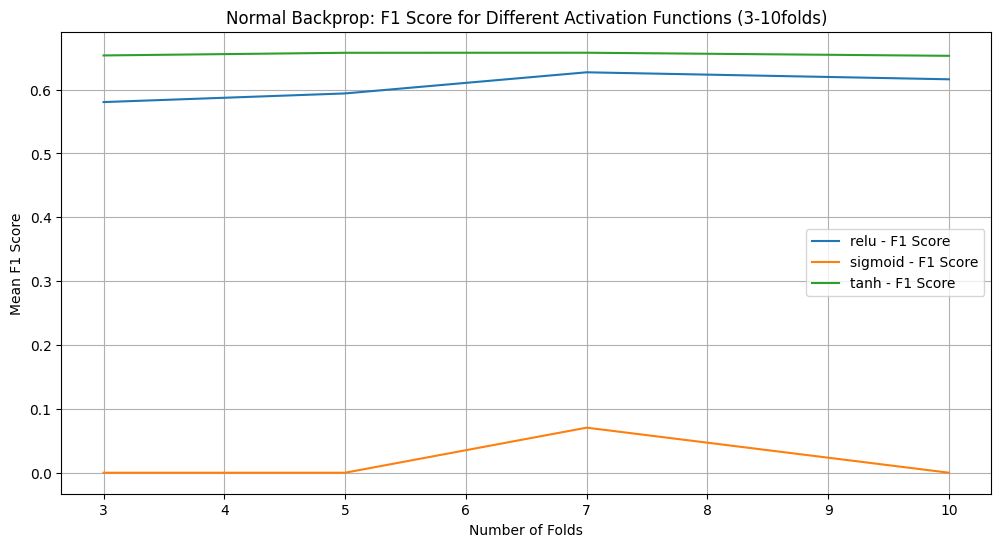

Best Activation Function: tanh with F1 Score: 0.657781168349785


In [64]:
# Plot results
plt.figure(figsize=(12, 6))
for activation in activation_functions_list:
    subset = results_df[results_df['activation'] == activation]
    plt.plot(subset['cv_folds'], subset['mean_f1_score'], label=f'{activation} - F1 Score')
plt.xlabel('Number of Folds')
plt.ylabel('Mean F1 Score')
plt.title('Normal Backprop: F1 Score for Different Activation Functions (3-10folds)')
plt.legend()
plt.grid()
plt.show()

# Print the best activation function
best_result = results_df.loc[results_df['mean_f1_score'].idxmax()]
print(f"Best Activation Function: {best_result['activation']} with F1 Score: {best_result['mean_f1_score']}")
